## Do some hyper parameter tuning using cross validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
import importlib
import climbing_ticks_helper as helper
importlib.reload(helper)
pd.set_option('display.expand_frame_repr', False) # display full data in terminal
%matplotlib inline

In [2]:
df = pd.read_csv('/app/csv_files/model_ready_ticks.csv')
X = df.drop(columns=['Attempts', 'Lead Style'])
y = df[['Attempts', 'Lead Style']]


# Hyperparameters:
# n_estimators: number of trees in the forest
# max_depth: max number of levels in each decision tree
# max_features: max number of features considered for splitting a node
# min_samples_split: min number of data points placed in a node before the node is split

n_estimators = np.linspace(10, 1000, 100, dtype=int)
max_features = [2,3,4,5,6]
max_depth = [2,3,4,5,6]
min_samples_split = [2,3,4,5,6,7,8,9,10]
# criterion = ['entropy', 'gini', 'log_loss']

random_grid = {'estimator__n_estimators': n_estimators,
               'estimator__max_features': max_features,
               'estimator__max_depth': max_depth,
               'estimator__min_samples_split': min_samples_split}

# Use a MultiOutputClassifer to wrap the RandomForestClassifier, so we can predict both attempts and lead style
moc = MultiOutputClassifier(RandomForestClassifier())
rf_random = RandomizedSearchCV(estimator=moc, param_distributions=random_grid, n_iter=5, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X, y)

print(rf_random.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_split=6, estimator__n_estimators=230; total time=   0.4s
[CV] END estimator__max_depth=3, estimator__max_features=6, estimator__min_samples_split=10, estimator__n_estimators=360; total time=   0.7s
[CV] END estimator__max_depth=5, estimator__max_features=4, estimator__min_samples_split=7, estimator__n_estimators=40; total time=   0.1s
[CV] END estimator__max_depth=5, estimator__max_features=4, estimator__min_samples_split=7, estimator__n_estimators=40; total time=   0.1s
[CV] END estimator__max_depth=3, estimator__max_features=6, estimator__min_samples_split=7, estimator__n_estimators=50; total time=   0.1s
[CV] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_split=3, estimator__n_estimators=350; total time=   0.5s
[CV] END estimator__max_depth=5, estimator__max_features=2, estimator__min_samples_split=2, estima


[CV] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_split=8, estimator__n_estimators=1000; total time=   1.9s
[CV] END estimator__max_depth=4, estimator__max_features=6, estimator__min_samples_split=3, estimator__n_estimators=240; total time=   0.6s
[CV] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_split=9, estimator__n_estimators=360; total time=   0.7s

[CV] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_split=7, estimator__n_estimators=430; total time=   1.0s
[CV] END estimator__max_depth=3, estimator__max_features=3, estimator__min_samples_split=5, estimator__n_estimators=720; total time=   1.3s
[CV] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_split=3, estimator__n_estimators=540; total time=   1.3s
[CV] END estimator__max_depth=3, estimator__max_features=5, estimator__min_samples_split=10, estimator__n_estimators=500; total time=   1.0s
[CV] END estimat

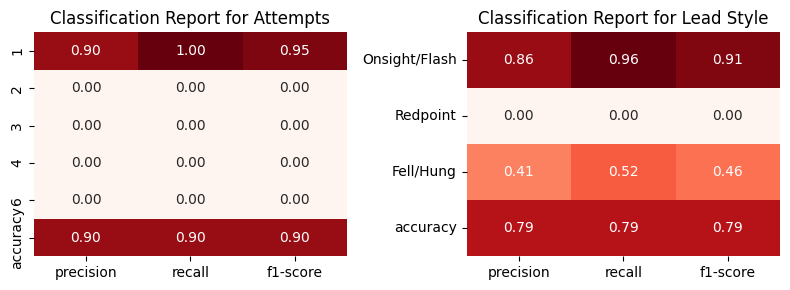

We got 45 Lead Style predictions wrong out of 213 total predictions.
We got 22 Attempts predictions wrong out of 213 total predictions.


,Route,RouteID,Date,Route Type,Alpine,Safety,Avg Stars,Pitches,Rating,Predicted Lead Style,Lead Style,Predicted Attempts,Attempts
3,Classic Crack,105789513,2020-07-12,Trad,0.0,G,2.7,1,5.9+,Onsight/Flash,Redpoint,1,1
6,Heresy,105793956,2023-11-27,Sport,0.0,G,3.1,1,5.11c,Onsight/Flash,Redpoint,1,3
11,Moscow Mule,114140845,2022-06-19,Sport,0.0,G,2.3,1,5.11d,Fell/Hung,Onsight/Flash,1,1
20,Cobra Head,114581191,2023-07-29,Sport,1.0,G,3.4,1,5.12b,Fell/Hung,Redpoint,1,2
23,Crackin' the Cherry,105842717,2017-07-03,Sport,1.0,G,3.0,1,5.10d,Onsight/Flash,Fell/Hung,1,1
27,Unnamed 5.10 Flare,116202042,2019-02-28,Trad,0.0,G,3.8,1,5.10,Onsight/Flash,Fell/Hung,1,1
34,[Redacted],107403063,2022-01-15,Sport,0.0,G,2.8,1,5.10d,Onsight/Flash,Redpoint,1,2
37,The Solace of Bolted Faces,106882008,2022-07-09,Sport,0.0,G,3.2,1,5.12a,Fell/Hung,Onsight/Flash,1,1
47,Crimp Scampi,105758605,2020-08-30,Sport,0.0,G,2.6,1,5.11a,Onsight/Flash,Fell/Hung,1,1
56,Fist Full of Quickdraws,112063799,2019-07-10,Sport,0.0,G,3.5,1,5.11d,Fell/Hung,Redpoint,1,2


In [10]:
# best values from the RandomSearchCV
n_estimators = 650
min_samples_split = 5
max_features = 6
max_depth = 2
criterion = 'gini'

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

rf = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, max_features=max_features, max_depth=max_depth, criterion=criterion)
moc=MultiOutputClassifier(rf)
moc.fit(X_train, y_train)

y_pred = moc.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)

# make y_test a df so that the columns match. this is probably not idiomatic
helper.print_classification_report(y_test, y_pred_df)

df_pretty = pd.read_csv('/app/csv_files/grouped_ticks.csv')
df_pretty = df_pretty[df_pretty['RouteID'].isin(X_test['RouteID'])].set_index('RouteID').loc[X_test['RouteID']].reset_index()
df_combined = helper.combine_predictions_with_data(df_pretty, y_pred_df)

# print all rows that got Lead Style wrong
wrong_preds_style = df_combined[df_combined['Lead Style'] != df_combined['Predicted Lead Style']]
wrong_preds_attempts = df_combined[df_combined['Attempts'] != df_combined['Predicted Attempts']]
print(f'We got {len(wrong_preds_style)} Lead Style predictions wrong out of {y_pred_df.shape[0]} total predictions.')
print(f'We got {len(wrong_preds_attempts)} Attempts predictions wrong out of {y_pred_df.shape[0]} total predictions.')

wrong_preds_style.head(10)

In [7]:
df_combined[df_combined['Attempts'] > 1]

,Route,RouteID,Date,Route Type,Alpine,Safety,Avg Stars,Pitches,Rating,Predicted Lead Style,Lead Style,Predicted Attempts,Attempts
8,Bluesfish,106661839,2023-03-18,Sport,0.0,G,1.6,1,5.11a,Onsight/Flash,Redpoint,1,2
22,Cool Ranch Flavor Extension,108891366,2024-03-05,Sport,0.0,G,3.1,1,5.12a,Fell/Hung,Redpoint,1,3
27,Empire of the Fenceless,105756790,2023-08-21,Sport,0.0,G,3.5,1,5.12a,Fell/Hung,Redpoint,1,2
40,Latin Lover,105789753,2023-12-01,Sport,0.0,G,3.3,1,5.12a,Fell/Hung,Fell/Hung,1,2
44,Return to Sender (aka Cap-gun),105753856,2021-09-04,Sport,0.0,G,2.9,1,5.12a,Fell/Hung,Redpoint,1,3
97,Animal Riots Activist,105754999,2022-03-27,Sport,0.0,G,2.8,1,5.12a,Fell/Hung,Redpoint,1,2
98,Conehead,105752596,2020-11-01,Sport,0.0,G,2.4,1,5.11b,Onsight/Flash,Fell/Hung,1,2
99,Flight 67 to Stockholm,105751630,2020-12-20,Sport,0.0,G,2.9,1,5.11a/b,Onsight/Flash,Redpoint,1,2
111,A Tall Cool One,105748478,2021-04-04,Sport,0.0,G,2.8,1,5.12a,Fell/Hung,Redpoint,1,3
114,Frank's Tame Years,106480921,2017-11-18,Trad,0.0,G,2.9,1,5.11a,Onsight/Flash,Redpoint,1,2
